In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit,KFold,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
11557,Bellandur,1262.0,2.0,47.00,2
11558,Green Glen Layout,1715.0,3.0,112.00,3
11559,Whitefield,3453.0,4.0,231.00,5
11560,other,3600.0,5.0,400.00,4


In [3]:
out = df[(df['total_sqft']<(df['total_sqft'].mean() - 3*df['total_sqft'].std())) | (df['total_sqft']>(df['total_sqft'].mean() + 3*df['total_sqft'].std()))].index

In [4]:
df.drop(index=out,inplace=True)

In [5]:
out1 = df[(df['total_sqft']<(df['total_sqft'].mean() - 3*df['total_sqft'].std())) | (df['total_sqft']>(df['total_sqft'].mean() + 3*df['total_sqft'].std()))].index

In [6]:
df.drop(index=out1,inplace=True)

In [7]:
out2 = df[(df['price']<(df['price'].mean() - 3*df['price'].std())) | (df['price']>(df['price'].mean() + 3*df['price'].std()))].index

In [8]:
df.drop(index=out2,inplace=True)

<Axes: xlabel='price', ylabel='Count'>

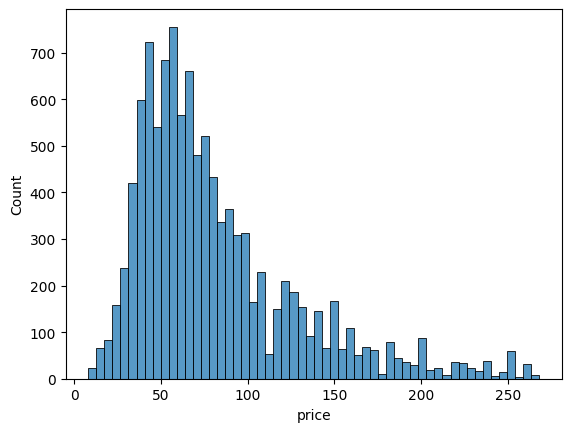

In [9]:
import seaborn as sns
sns.histplot(df['price'])

In [10]:
X = df.drop(columns=['price'],axis=1)
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=4)

In [16]:
std = ['total_sqft']
trf1 = ColumnTransformer([
    ('one_hot_encoding',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[0])
],remainder='passthrough')

trf2 = LinearRegression()

pipe = make_pipeline(trf1,trf2)
cv = ShuffleSplit(n_splits=5)
print(cross_val_score(pipe,X_train,np.log(y_train),cv=cv,scoring='r2'))
pipe.fit(X_train,np.log(y_train))
pred = pipe.predict(X_test)
print(r2_score(np.log(y_test),pred))
print(np.sqrt(mean_squared_error(np.log(y_test),pred)))

[0.68105063 0.64738585 0.692967   0.67171378 0.67112454]
0.65891083092832
0.31362753567971996


In [18]:
y = np.log(y)

In [23]:
std = ['total_sqft']
trf1 = ColumnTransformer([
    ('one_hot_encoding',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[0])
],remainder='passthrough')

trf2 = LinearRegression()

pipe = make_pipeline(trf1,trf2)

pipe.fit(X,y)
pred = pipe.predict(X)
print(r2_score(y,pred))
print(np.sqrt(mean_squared_error(y,pred)))

0.66903859182301
0.31237652144250905


In [25]:
np.exp(0.31237652144250905)

1.3666691764161252

In [85]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('model.pkl','wb'))


In [87]:
df

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
11555,Yeshwanthpur,1675.0,3.0,92.13,3
11556,Rachenahalli,1050.0,2.0,52.71,2
11557,Bellandur,1262.0,2.0,47.00,2
11558,Green Glen Layout,1715.0,3.0,112.00,3


In [91]:
pipe.predict([['Green Glen Layout',1715,3.0,3]])

c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([4.7039299])

In [92]:
np.exp(4.70)

109.94717245212352